In [28]:
import pandas as pd
import numpy as np

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
mn = MinMaxScaler()
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10, shuffle=True)

In [43]:
df = pd.read_csv("forestfires.csv")

In [5]:
df.shape

(517, 13)

In [67]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


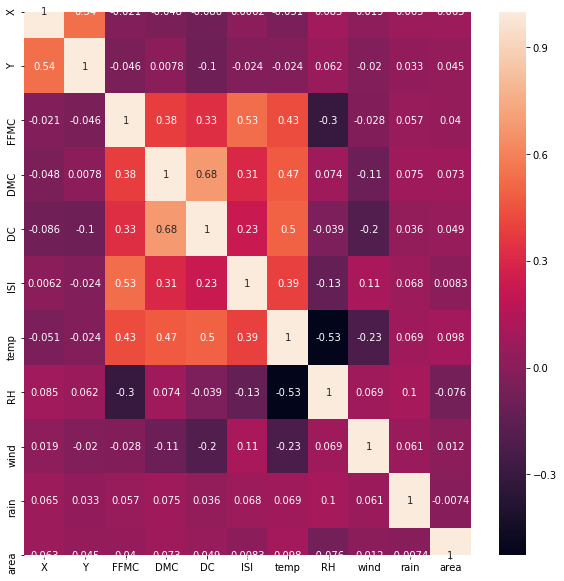

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [44]:
df.loc[df["day"].isin(['mon', 'wed', 'thu','tue']),"day"] = "weekday"
df.loc[df["day"].isin(['fri','sat', 'sun']),"day"] = "weekends"

In [45]:
df = df[df["area"] < 800]

In [46]:
df = df.join(pd.get_dummies(df["month"]))
df = df.join(pd.get_dummies(df["day"]))
df.drop(["month","day"],inplace=True,axis=1)
df = (df - df.min())/(df.max()-df.min())
Y = df["area"]
df.drop("area",axis=1,inplace=True)

In [67]:
ar1 = list()
ar2 = list()
for train, test in kf.split(df):
    X_train, y_train = df.iloc[train,:], Y.iloc[train]
    X_test, y_test = df.iloc[test,:], Y.iloc[test]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    pred = lr.predict(X_test)
    pred1 = np.array([np.mean(y_train) for i in range(pred.shape[0])])
    ar1.append(mean_squared_error(pred,y_test))
    ar2.append(mean_squared_error(pred1,y_test))

print(ar)
print(np.array(ar1).mean())
print(np.array(ar2).mean())

[0.0002943702077563851, 0.0013979997078688137, 0.0025712937876654607, 0.0001926153775627198, 0.0003118599130950885, 0.004041920203233948, 0.0019234937831069142, 0.00034721767717960496, 0.0014052528125493482, 0.02010420541724696]
2.1977860534063567e+21
0.0032268021266353883


In [57]:
from sklearn.metrics import r2_score